# VGG-16 Architecture

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import glob
import numpy as np
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
training_set=train_datagen.flow_from_directory('dataset/Train',target_size=(224,224),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory('dataset/Test',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 900 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [5]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='vgg16'))
model.add(Flatten(name='flatten'))
model.add(Dense(256, activation='relu', name='fc1'))
model.add(Dense(128, activation='relu', name='fc2'))
model.add(Dense(3, activation='sigmoid', name='output'))
model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy','Precision','Recall'])

In [6]:
model_path = "vgg.h5"

callbacks = [
    ModelCheckpoint(model_path, monitor='accuracy', verbose=1, save_best_only=True)
]

In [7]:
epochs = 90
batch_size = 32

In [8]:
#### Fitting the model
history = model.fit(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size,
           callbacks=callbacks)

Epoch 1/90
28/28 [==============================] - 488s 17s/step - loss: 1.0977 - accuracy: 0.3537 - precision: 0.3634 - recall: 0.6820 - val_loss: 1.0976 - val_accuracy: 0.3438 - val_precision: 0.3438 - val_recall: 0.3438

Epoch 00001: accuracy improved from -inf to 0.35369, saving model to vgg.h5
Epoch 2/90
28/28 [==============================] - 479s 17s/step - loss: 1.0963 - accuracy: 0.3329 - precision: 0.3722 - recall: 0.4781 - val_loss: 1.0936 - val_accuracy: 0.6484 - val_precision: 0.3425 - val_recall: 0.6797

Epoch 00002: accuracy did not improve from 0.35369
Epoch 3/90
28/28 [==============================] - 478s 17s/step - loss: 1.0914 - accuracy: 0.5592 - precision: 0.4638 - recall: 0.8304 - val_loss: 1.0864 - val_accuracy: 0.6719 - val_precision: 0.5880 - val_recall: 0.9922

Epoch 00003: accuracy improved from 0.35369 to 0.55915, saving model to vgg.h5
Epoch 4/90
28/28 [==============================] - 475s 17s/step - loss: 1.0828 - accuracy: 0.6014 - precision: 0.5298

28/28 [==============================] - 497s 17s/step - loss: 1.0998 - accuracy: 0.3353 - precision: 0.3304 - recall: 0.6486 - val_loss: 1.1004 - val_accuracy: 0.3281 - val_precision: 0.3242 - val_recall: 0.6484

Epoch 00030: accuracy did not improve from 0.71083
Epoch 31/90
28/28 [==============================] - 474s 17s/step - loss: 1.0995 - accuracy: 0.3318 - precision: 0.3324 - recall: 0.6647 - val_loss: 1.0988 - val_accuracy: 0.3281 - val_precision: 0.3320 - val_recall: 0.6641

Epoch 00031: accuracy did not improve from 0.71083
Epoch 32/90
28/28 [==============================] - 479s 17s/step - loss: 1.0985 - accuracy: 0.3341 - precision: 0.3360 - recall: 0.6659 - val_loss: 1.0986 - val_accuracy: 0.3203 - val_precision: 0.3281 - val_recall: 0.6562

Epoch 00032: accuracy did not improve from 0.71083
Epoch 33/90
28/28 [==============================] - 479s 18s/step - loss: 1.0985 - accuracy: 0.3479 - precision: 0.3347 - recall: 0.6694 - val_loss: 1.0980 - val_accuracy: 0.3359 -

28/28 [==============================] - 482s 17s/step - loss: 0.5009 - accuracy: 0.7707 - precision: 0.5009 - recall: 0.9850 - val_loss: 0.4065 - val_accuracy: 0.7891 - val_precision: 0.5000 - val_recall: 0.9922

Epoch 00059: accuracy improved from 0.75576 to 0.77074, saving model to vgg.h5
Epoch 60/90
28/28 [==============================] - 490s 18s/step - loss: 0.5980 - accuracy: 0.7108 - precision: 0.4947 - recall: 0.9700 - val_loss: 0.5604 - val_accuracy: 0.6875 - val_precision: 0.4961 - val_recall: 0.9922

Epoch 00060: accuracy did not improve from 0.77074
Epoch 61/90
28/28 [==============================] - 487s 17s/step - loss: 0.5710 - accuracy: 0.7523 - precision: 0.4921 - recall: 0.9677 - val_loss: 0.4134 - val_accuracy: 0.7812 - val_precision: 0.5000 - val_recall: 1.0000

Epoch 00061: accuracy did not improve from 0.77074
Epoch 62/90
28/28 [==============================] - 497s 18s/step - loss: 0.5525 - accuracy: 0.7454 - precision: 0.4953 - recall: 0.9700 - val_loss: 0.4

28/28 [==============================] - 474s 17s/step - loss: 0.4165 - accuracy: 0.8410 - precision: 0.5663 - recall: 0.9839 - val_loss: 0.4421 - val_accuracy: 0.7969 - val_precision: 0.5267 - val_recall: 1.0000

Epoch 00088: accuracy did not improve from 0.85253
Epoch 89/90
28/28 [==============================] - 466s 17s/step - loss: 0.3580 - accuracy: 0.8560 - precision: 0.5293 - recall: 0.9873 - val_loss: 0.2632 - val_accuracy: 0.8828 - val_precision: 0.5541 - val_recall: 1.0000

Epoch 00089: accuracy improved from 0.85253 to 0.85599, saving model to vgg.h5
Epoch 90/90
28/28 [==============================] - 476s 17s/step - loss: 0.3856 - accuracy: 0.8433 - precision: 0.5371 - recall: 0.9919 - val_loss: 0.2704 - val_accuracy: 0.9062 - val_precision: 0.5246 - val_recall: 1.0000

Epoch 00090: accuracy did not improve from 0.85599


In [9]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(test_set)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
5/5 [==============================] - 15s 3s/step - loss: 0.2693 - accuracy: 0.9000 - precision: 0.5208 - recall: 1.0000
Test Accuracy: 89.99999761581421


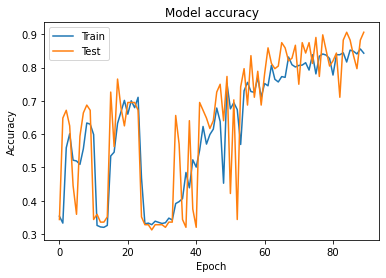

In [10]:
def accuracy():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
accuracy()

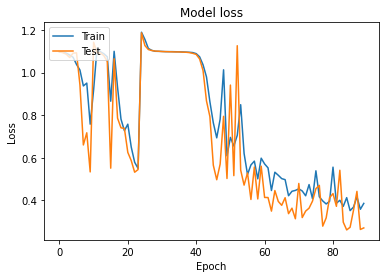

In [11]:
def loss():
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
loss()

In [12]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['precision'])  # from the history var take the accuracy history
    plt.plot(history.history['val_precision'])  # from the history var take the val_accuracy history    
        
    plt.title('Model precision')
    plt.ylabel('precision')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left') # represents which graph is train and test
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['recall'])
    plt.plot(history.history['val_recall'])
        
    plt.title('Model recall')
    plt.ylabel('recall')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

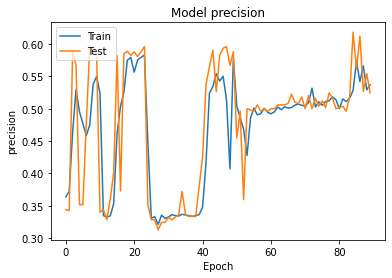

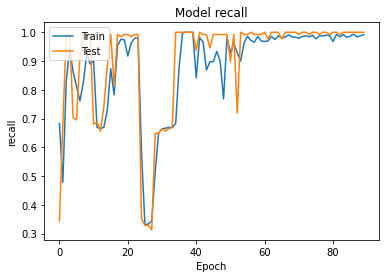

In [13]:
graph()